In [10]:
#https://developers.google.com/earth-engine/python_install
#You 1st need to sign up your Google account here: https://earthengine.google.com/ (it takes a couple of hours to get accepted. The API won't work before.)
import ee
import folium
from IPython.display import Image

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import urllib.request
import zipfile, glob

# ee.Authenticate()
ee.Initialize()

In [2]:
# """import list of polygon coordinate to extract data. 
# Currently, i use coord data from https://energydata.info/dataset/solar-potential/resource/14419ae8-acf7-45ec-8c65-fbe8bf975deb
# as experiment
# """
# import json

# with open('data.geojson') as f:
#     data = json.load(f)
# coord = pd.DataFrame(data)
# coord['coordinates'] = coord['features'].apply(lambda x: x['geometry']['coordinates'][0])
# coord

In [3]:
# Nigeria area, roughly
reg = [[2.5662475973293795, 13.957828003533553],
       [2.5662475973293795, 4.074997740170405],
       [14.87093509732938, 4.074997740170405],
       [14.87093509732938, 13.957828003533553]]

In [4]:
# tutorial from: https://github.com/google/earthengine-api/blob/master/python/examples/py/Image/download.py

In [5]:
def download_tifz(path, local_path):
    ''' download url, unzip and return path to TIF '''
    # download file
    urllib.request.urlretrieve(path, local_path+'.zip')

    # unzip
    with zipfile.ZipFile(local_path+'.zip', 'r') as zip_ref:
        zip_ref.extractall(local_path)

    return glob.glob(local_path+'/*.tif')[0]

In [6]:
# night time 20190301
image1 = ee.Image("NOAA/VIIRS/DNB/MONTHLY_V1/VCMSLCFG/20190301").select('avg_rad')
path = image1.getDownloadUrl({
    'scale': 100,
    'crs': 'EPSG:4326',
    'region': reg,
})

night_path = download_tifz(path, './night_time_nga')
!ls -lh {night_path}

-rwxrwxrwx 1 henrique henrique 576M Nov 14 15:49 ./night_time_nga/20190301.avg_rad.tif


In [17]:
# population WorldPop
image1 = ee.Image("WorldPop/GP/100m/pop/NGA_2020").select('population')
path = image1.getDownloadUrl({
    'scale': 100,
    'crs': 'EPSG:4326',
    'region': reg,
})
# print(path)

pop_path = download_tifz(path, './population_nga')
!ls -lh {pop_path}

-rwxrwxrwx 1 henrique henrique 576M Nov 14 16:43 ./population_nga/NGA_2020.population.tif


In [3]:
# # read extracted .tif file
# from PIL import Image
# import numpy
# im = Image.open(pop_path)
# im.show()

In [4]:
# imarray = numpy.array(im)

In [11]:
import rasterio
dataset = rasterio.open(night_path)
pamlico_image = dataset.read()

In [12]:
num_bands = dataset.count
print('Number of bands in image: {n}\n'.format(n=num_bands))

# How many rows and columns?
rows, cols = dataset.shape
print('Image size is: {r} rows x {c} columns\n'.format(r=rows, c=cols))

# What driver was used to open the raster?
driver = dataset.driver
print('Raster driver: {d}\n'.format(d=driver))

# What is the raster's projection?
proj = dataset.crs
print('Image projection:')
print(proj)

dataset.close()

Number of bands in image: 1

Image size is: 11002 rows x 13699 columns

Raster driver: GTiff

Image projection:
EPSG:4326


In [13]:
pamlico_image

array([[[0.29, 0.29, 0.29, ..., 0.17, 0.17, 0.17],
        [0.29, 0.29, 0.29, ..., 0.17, 0.17, 0.17],
        [0.25, 0.25, 0.25, ..., 0.21, 0.21, 0.21],
        ...,
        [0.11, 0.11, 0.11, ..., 0.25, 0.25, 0.25],
        [0.11, 0.11, 0.11, ..., 0.25, 0.25, 0.25],
        [0.11, 0.11, 0.11, ..., 0.25, 0.25, 0.25]]], dtype=float32)

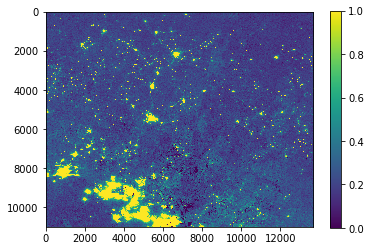

In [24]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
img = ax.imshow(pamlico_image[0,:,:].clip(0, 1))  # clip values below 0 or above 1
_ = fig.colorbar(img, ax=ax) # we have to pass the current plot as an argument thus have to set it as a variable